In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn import metrics

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('../Datasets/REGN_processed.csv')
df1 = df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [5]:
def build_and_train_model(X_train, y_train):
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)
    return model

In [6]:
def predict_future(model, last_data, n_future, n_steps=100):
    temp_input = list(last_data)
    temp_input = temp_input[0].tolist()
    
    lst_output = []
    i = 0
    while i < n_future:
        if len(temp_input) > n_steps:
            x_input = np.array(temp_input[1:])
            x_input = x_input.reshape(1, -1)
            x_input = x_input.reshape((1, n_steps, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, n_steps, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
            
    return np.array(lst_output).reshape(-1, 1) 

In [7]:
def plot_predictions(df1, scaler, train_data, test_data, y_pred, lst_output, train_size, test_size, title):
    train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
    plt.plot(train_data_index, scaler.inverse_transform(train_data))

    test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
    plt.plot(test_data_index, scaler.inverse_transform(test_data))

    test_pred_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
    plt.plot(test_pred_index,scaler.inverse_transform(y_pred))

    prediect_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
    plt.plot(prediect_data_index_30, scaler.inverse_transform(lst_output[:30]))

    prediect_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
    plt.plot(prediect_data_index_60, scaler.inverse_transform(lst_output[30:60]))

    prediect_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
    plt.plot(prediect_data_index_90, scaler.inverse_transform(lst_output[60:90]))

    plt.legend(['Train', 'Test', 'Predict', 'Predict30days', 'Predict60days', 'Predict90days'])
    plt.title(title)
    plt.show()


In [8]:
def evaluate_model(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mape = metrics.mean_absolute_percentage_error(y_test, y_pred)*100
    return mae, rmse, mape

In [9]:
ratios = [0.7, 0.8, 0.6]
time_step = 100

# Results dictionary to store evaluation metrics for each ratio
results = {}

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0571
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0036
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0015
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0011
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0012
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0012
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0011
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0011
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0010
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0010
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0010
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0011
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 9.9292e-04
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 8.7363e-04
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/s

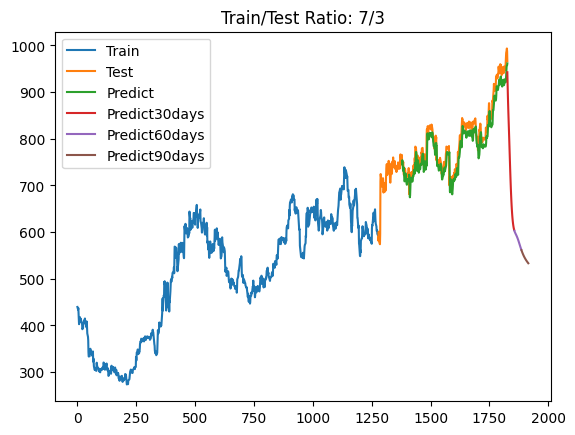

Epoch 1/100


c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.0923
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0044
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0019
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.0013
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0013
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0011
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0013
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - loss: 0.0013
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 0.0012
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0011
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0012
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0010
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 9.9434e-04
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0012
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/st

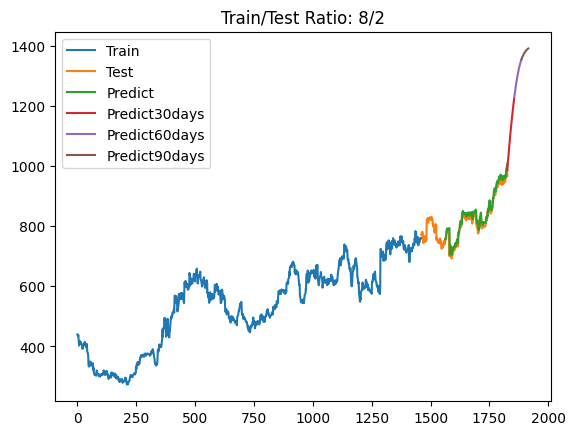

Epoch 1/100


c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0625
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0088
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0027
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0013
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0012
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0011
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0011
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0011
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0010  
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 9.2553e-04
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 9.8976e-04
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 9.4637e-04
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 9.8222e-04
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 9.1071e-04
Epoch 15/100
16/16 ━━━━━━━━━━━━━━━

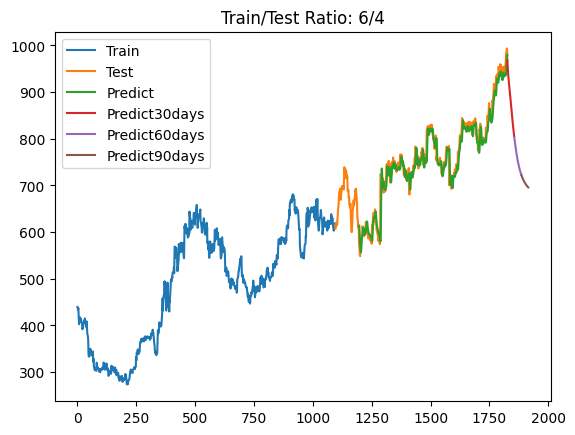

Ratio 7/3: MAE = 16.76117321559361, RMSE = 19.009511825173114, MAPE = 2.055998474770185
Ratio 8/2: MAE = 11.206740888487625, RMSE = 13.443822737793504, MAPE = 1.3603652385886875
Ratio 6/4: MAE = 10.803802714998758, RMSE = 15.246637109469626, MAPE = 1.4349762199557385


In [10]:
for ratio in ratios:
    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    training_size = int(len(df1) * ratio)
    test_size = len(df1) - training_size
    train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

    # Tạo tập huấn luyện và kiểm tra
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Xây dựng và huấn luyện mô hình
    model = build_and_train_model(X_train, y_train)

    # Dự đoán
    y_pred = model.predict(X_test)

    # Đảo ngược quá trình chuẩn hóa
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Đánh giá mô hình
    mae, rmse, mape = evaluate_model(y_test_inv, y_pred_inv)
    results[f'Ratio {int(ratio*10)}/{10-int(ratio*10)}'] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

    # Dự đoán các giá trị trong tương lai
    last_data = test_data[-time_step:].reshape(1, -1)
    lst_output = predict_future(model, last_data, 90)

    # Vẽ biểu đồ
    plot_predictions(df1, scaler, train_data, test_data, y_pred, lst_output, training_size, test_size, f"Train/Test Ratio: {int(ratio*10)}/{10-int(ratio*10)}")

# In kết quả đánh giá
for ratio, metrics in results.items():
    print(f'{ratio}: MAE = {metrics["MAE"]}, RMSE = {metrics["RMSE"]}, MAPE = {metrics["MAPE"]}')